In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
beer =pd.read_csv("Consumo_cerveja.csv")

In [3]:
beer.shape

(941, 7)

In [4]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [6]:
beer= beer.rename(columns = {"Data":"Date","Consumo de cerveja (litros)":"Consumption in Litres"})

In [7]:
beer.head()

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumption in Litres
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [8]:
beer.isnull().sum()/len(beer.index)*100

Date                      61.211477
Temperatura Media (C)     61.211477
Temperatura Minima (C)    61.211477
Temperatura Maxima (C)    61.211477
Precipitacao (mm)         61.211477
Final de Semana           61.211477
Consumption in Litres     61.211477
dtype: float64

In [9]:
beer.tail()

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumption in Litres
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# We can see that the below rows are empty cells and as all columns we dont have Ny values and we have same number of missing value
#from the missing value percntage

In [11]:
beer[beer["Date"]=="NaN"]

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumption in Litres


In [12]:
for i in beer.columns:
    print(beer[i].unique())

['2015-01-01' '2015-01-02' '2015-01-03' '2015-01-04' '2015-01-05'
 '2015-01-06' '2015-01-07' '2015-01-08' '2015-01-09' '2015-01-10'
 '2015-01-11' '2015-01-12' '2015-01-13' '2015-01-14' '2015-01-15'
 '2015-01-16' '2015-01-17' '2015-01-18' '2015-01-19' '2015-01-20'
 '2015-01-21' '2015-01-22' '2015-01-23' '2015-01-24' '2015-01-25'
 '2015-01-26' '2015-01-27' '2015-01-28' '2015-01-29' '2015-01-30'
 '2015-01-31' '2015-02-01' '2015-02-02' '2015-02-03' '2015-02-04'
 '2015-02-05' '2015-02-06' '2015-02-07' '2015-02-08' '2015-02-09'
 '2015-02-10' '2015-02-11' '2015-02-12' '2015-02-13' '2015-02-14'
 '2015-02-15' '2015-02-16' '2015-02-17' '2015-02-18' '2015-02-19'
 '2015-02-20' '2015-02-21' '2015-02-22' '2015-02-23' '2015-02-24'
 '2015-02-25' '2015-02-26' '2015-02-27' '2015-02-28' '2015-03-01'
 '2015-03-02' '2015-03-03' '2015-03-04' '2015-03-05' '2015-03-06'
 '2015-03-07' '2015-03-08' '2015-03-09' '2015-03-10' '2015-03-11'
 '2015-03-12' '2015-03-13' '2015-03-14' '2015-03-15' '2015-03-16'
 '2015-03-

In [13]:
# Preprocessing 

beer = beer.dropna()

In [14]:
beer.isnull().sum()/len(beer.index)*100

Date                      0.0
Temperatura Media (C)     0.0
Temperatura Minima (C)    0.0
Temperatura Maxima (C)    0.0
Precipitacao (mm)         0.0
Final de Semana           0.0
Consumption in Litres     0.0
dtype: float64

In [15]:
beer.shape

(365, 7)

In [16]:
beer["Date"] = pd.to_datetime(beer["Date"])

In [17]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    365 non-null    datetime64[ns]
 1   Temperatura Media (C)   365 non-null    object        
 2   Temperatura Minima (C)  365 non-null    object        
 3   Temperatura Maxima (C)  365 non-null    object        
 4   Precipitacao (mm)       365 non-null    object        
 5   Final de Semana         365 non-null    float64       
 6   Consumption in Litres   365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [18]:
# Changing the data Types as most of the numeric variables are in Object types

l = ["Temperatura Media (C)","Temperatura Minima (C)","Temperatura Maxima (C)","Precipitacao (mm)"]
for i in l:
    beer[i] = beer[i].apply(lambda x: np.float(re.sub(r',','.',x)))

In [19]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    365 non-null    datetime64[ns]
 1   Temperatura Media (C)   365 non-null    float64       
 2   Temperatura Minima (C)  365 non-null    float64       
 3   Temperatura Maxima (C)  365 non-null    float64       
 4   Precipitacao (mm)       365 non-null    float64       
 5   Final de Semana         365 non-null    float64       
 6   Consumption in Litres   365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


In [20]:
beer["Year"] = beer["Date"].dt.year
beer["Month"] = beer["Date"].dt.month
beer["Day"] = beer["Date"].dt.day
beer["Week"] = beer["Date"].dt.week

In [21]:
beer.head()

,Date,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumption in Litres,Year,Month,Day,Week
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,2015,1,1,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,2015,1,2,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,2015,1,3,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015,1,4,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,2015,1,5,2


In [22]:
# All the Preprocessing Steps are done, we can now remove the date column if we want
# Performing little EDA

In [23]:
Date_column = ["Year","Month","Day","Week"]

for j in Date_column:
    print(j , " ----->"  ,beer[j].unique())

Year  -----> [2015]
Month  -----> [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day  -----> [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Week  -----> [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


In [24]:
# We found that there is only one year, we can drop the column as it wont be useful for us

beer = beer.drop("Year",axis=1)

<AxesSubplot:xlabel='Week'>

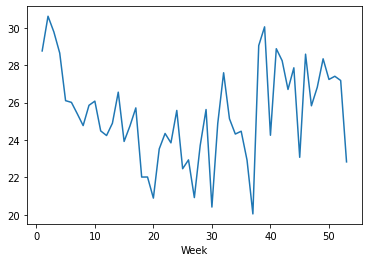

In [25]:
# Beer Consumption Weekly Basis
beer.groupby("Week")["Consumption in Litres"].mean().plot()

<AxesSubplot:xlabel='Month'>

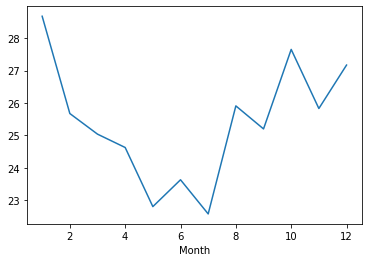

In [26]:
beer.groupby("Month")["Consumption in Litres"].mean().plot()

<AxesSubplot:xlabel='Month', ylabel='Consumption in Litres'>

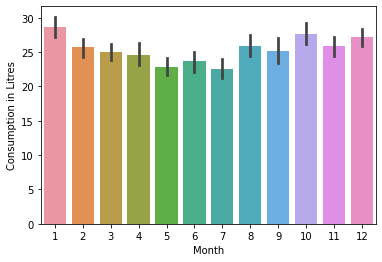

In [27]:
sns.barplot(x= beer["Month"],y=beer["Consumption in Litres"],data=beer)



In [28]:
# January and December - were the productive month interms of beer sales since it is a hoilday season like xmas, new year.
# As the summer sets in the beer consumption tends to decrease

In [29]:
num_col = beer.select_dtypes(include = ["float64"])

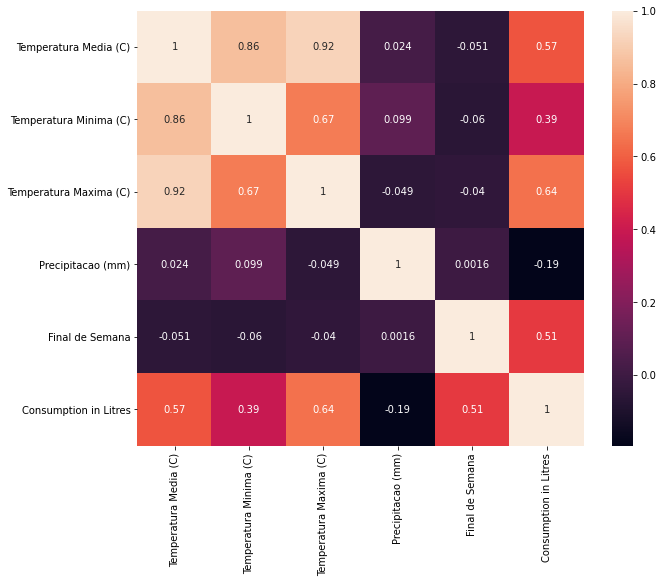

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(),annot=True)
plt.show()

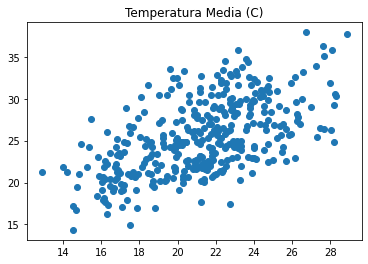

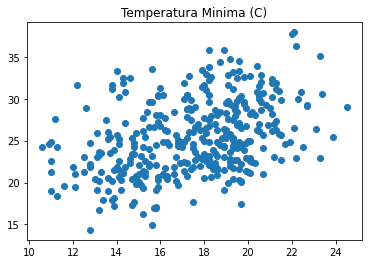

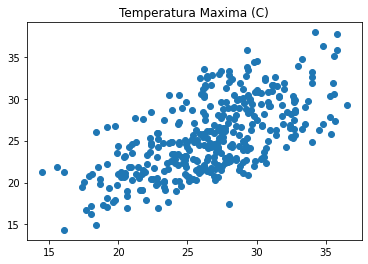

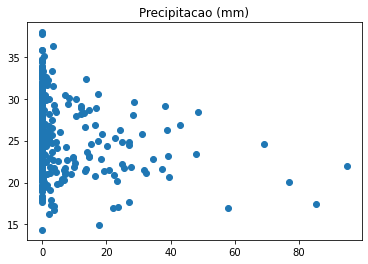

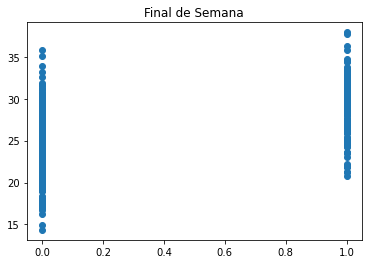

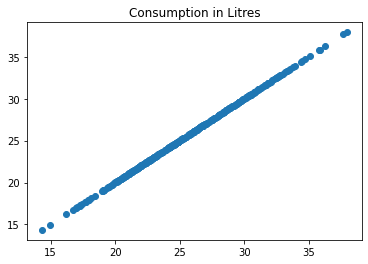

In [31]:
for j in num_col:
    plt.scatter(x=beer[j],y=beer["Consumption in Litres"])
    plt.title(j)
    plt.show()

In [32]:
# From this we can see that:
#When Temperature is Medium or Maximum, beer consumption rate increases

# Whenever the rain/precipiation, beer consumptions goes for a toss.people dont drink beer that time

# Dring the last few days of the month, when there is a salary crunch beer consumption redcudes probably(21 to 31)

<AxesSubplot:xlabel='Day'>

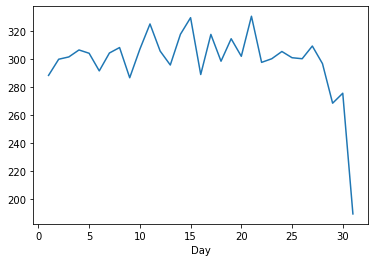

In [33]:
# Which day of the year beer was consumed more:
beer.groupby("Day")["Consumption in Litres"].sum().plot()

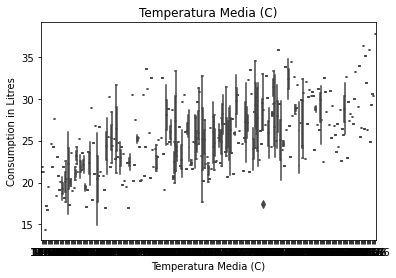

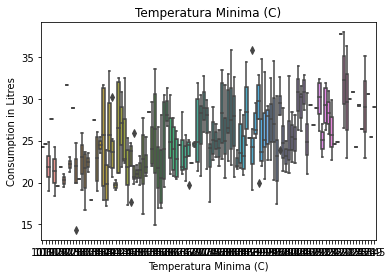

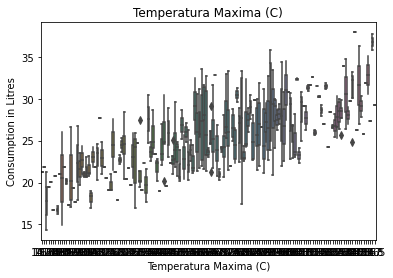

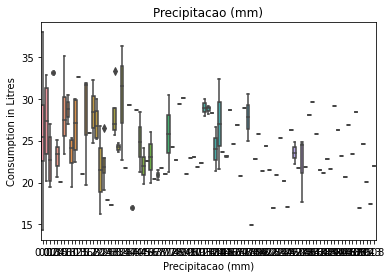

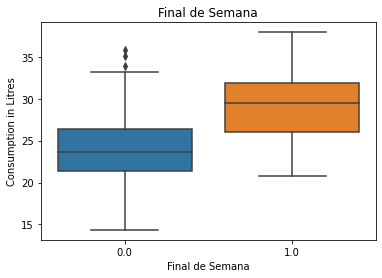

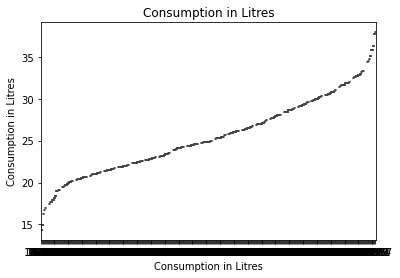

In [34]:
for j in num_col:
    sns.boxplot(x=beer[j],y=beer["Consumption in Litres"])
    plt.title(j)
    plt.show()

In [35]:
# We can drop the date column which is not required 

beer.drop("Date",axis=1,inplace=True)

In [36]:
# Model Preparation and Building:

X= beer.drop("Consumption in Litres",axis=1)
y =beer["Consumption in Litres"]

In [37]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [38]:
X

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Month,Day,Week
0,1.912508,2.281333,1.365781,-0.419062,-0.631243,-1.602745,-1.673503,-1.726692
1,1.824340,2.493924,1.597722,-0.419062,-0.631243,-1.602745,-1.559818,-1.726692
2,1.131590,1.749853,0.762735,-0.419062,1.584177,-1.602745,-1.446134,-1.726692
3,0.867085,1.430966,0.461212,-0.322294,1.584177,-1.602745,-1.332449,-1.726692
4,0.816703,1.253806,0.391630,-0.419062,-0.631243,-1.602745,-1.218764,-1.660280
...,...,...,...,...,...,...,...,...
360,0.873383,1.289238,0.368436,0.677640,1.584177,1.587648,1.282303,1.660280
361,0.445137,1.289238,0.020525,-0.419062,-0.631243,1.587648,1.395988,1.726692
362,0.142846,1.005782,-0.582521,0.411528,-0.631243,1.587648,1.509672,1.726692
363,0.048380,0.651463,-0.976820,0.088969,-0.631243,1.587648,1.623357,1.726692


# Training 

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [40]:
y_train.shape

(255,)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor

In [62]:
models = {
    "Linear Regression"     : LinearRegression(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "XGBOOSTREGRESSOR"      : XGBRegressor(),
    "Ridge"                 : Ridge(),
    "Lasso"                 : Lasso(),
    "HuberRegresor"         : HuberRegressor() 
    
}

In [63]:
for i in models.values():
    i.fit(X_train,y_train)

In [64]:
for name,model in models.items():
    print(name, " " , "R2 score" ,    model.score(X_test,y_test))

Linear Regression   R2 score 0.6161812899518284
DecisionTreeRegressor   R2 score 0.17337199399238712
XGBOOSTREGRESSOR   R2 score 0.5179348832822992
Ridge   R2 score 0.6178065120931475
Lasso   R2 score 0.5750385539916603
HuberRegresor   R2 score 0.5994836630865283


In [ ]:
# HyperParameter Tuning :

# I will try to cover it in the next part.